In [662]:
# Automatically reload modules when they change
%reload_ext autoreload
%autoreload 2

Loading dataset

In [663]:
from nn import *
from sklearn.datasets import fetch_california_housing
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
import copy


In [664]:
data = fetch_california_housing()
print(data.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [665]:
X, y = housing_data = fetch_california_housing(return_X_y=True)
print(X.shape, y.shape)
print(y.mean(), y.std(), y.min(), y.max())
print(type(y), y.dtype)
print(X[0], y[0])

(20640, 8) (20640,)
2.0685581690891475 1.153928204041225 0.14999 5.00001
<class 'numpy.ndarray'> float64
[   8.3252       41.            6.98412698    1.02380952  322.
    2.55555556   37.88       -122.23      ] 4.526


Data exploration: Domain Knowledge, Data Cleaning/Preprocessing, Feature Creation/Construction/Transformation (Sums, Average, Check Existence, Log/Exp), Feature Encoding/Standardization (Scaling, One-Hot-Encodind, Flattening), Feature Selection (Identify Most Relevant Features)

In [666]:
column_mapping = {
    "MedInc": 0,
    "HouseAge": 1,
    "AveRooms": 2,
    "AveBedrms": 3,
    "Population": 4,
    "AveOccup": 5,
    "Latitude": 6,
    "Longitude": 7
}

In [667]:
housing = fetch_california_housing(as_frame=True)
df = housing.frame

# Compute correlation matrix
corr_matrix = df.corr()
print(corr_matrix)

               MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
MedInc       1.000000 -0.119034  0.326895  -0.062040    0.004834  0.018766   
HouseAge    -0.119034  1.000000 -0.153277  -0.077747   -0.296244  0.013191   
AveRooms     0.326895 -0.153277  1.000000   0.847621   -0.072213 -0.004852   
AveBedrms   -0.062040 -0.077747  0.847621   1.000000   -0.066197 -0.006181   
Population   0.004834 -0.296244 -0.072213  -0.066197    1.000000  0.069863   
AveOccup     0.018766  0.013191 -0.004852  -0.006181    0.069863  1.000000   
Latitude    -0.079809  0.011173  0.106389   0.069721   -0.108785  0.002366   
Longitude   -0.015176 -0.108197 -0.027540   0.013344    0.099773  0.002476   
MedHouseVal  0.688075  0.105623  0.151948  -0.046701   -0.024650 -0.023737   

             Latitude  Longitude  MedHouseVal  
MedInc      -0.079809  -0.015176     0.688075  
HouseAge     0.011173  -0.108197     0.105623  
AveRooms     0.106389  -0.027540     0.151948  
AveBedrms    0.069721   0.0

In [668]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


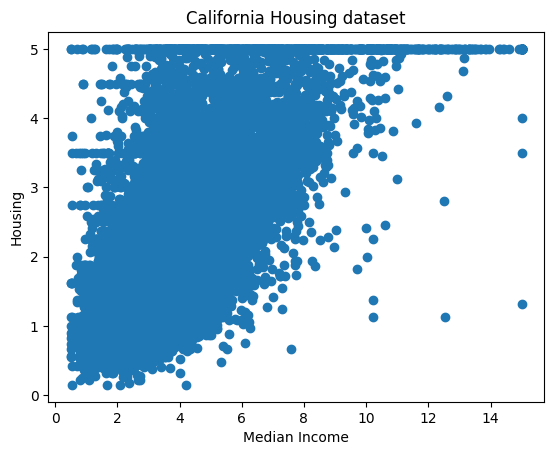

In [669]:
plt.scatter(X[:, 0], y)
plt.xlabel("Median Income")
plt.ylabel("Housing")
plt.title("California Housing dataset")
plt.show()

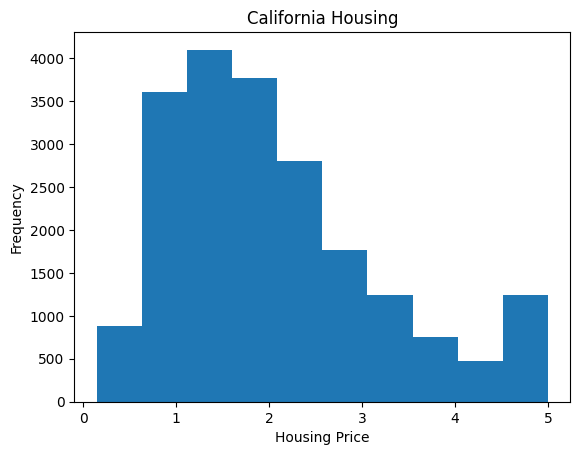

In [670]:
plt.hist(y)
plt.xlabel("Housing Price")
plt.ylabel("Frequency")
plt.title("California Housing")
plt.show()

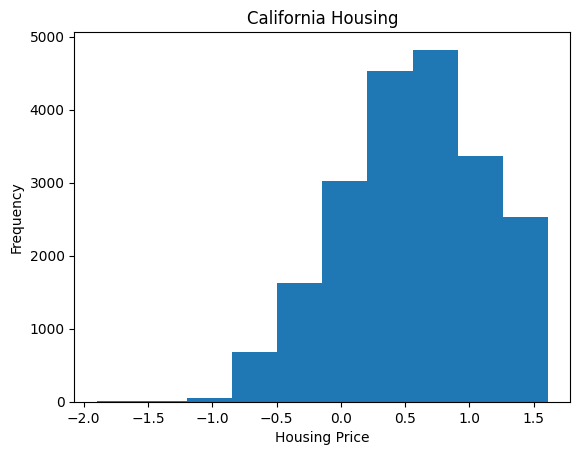

In [671]:
plt.hist(np.log(y))
plt.xlabel("Housing Price")
plt.ylabel("Frequency")
plt.title("California Housing")
plt.show()

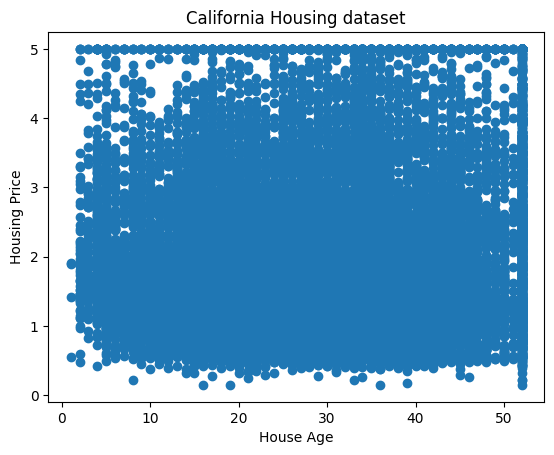

In [672]:
plt.scatter(X[:, column_mapping["HouseAge"]], y)
plt.xlabel("House Age")
plt.ylabel("Housing Price")
plt.title("California Housing dataset")
plt.show()

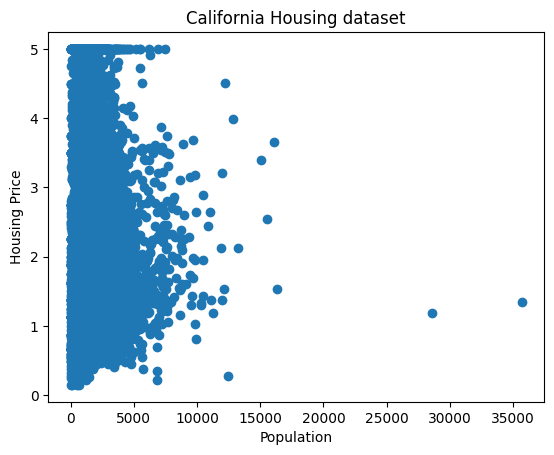

In [673]:
plt.scatter(X[:, column_mapping["Population"]], y)
plt.xlabel("Population")
plt.ylabel("Housing Price")
plt.title("California Housing dataset")
plt.show()

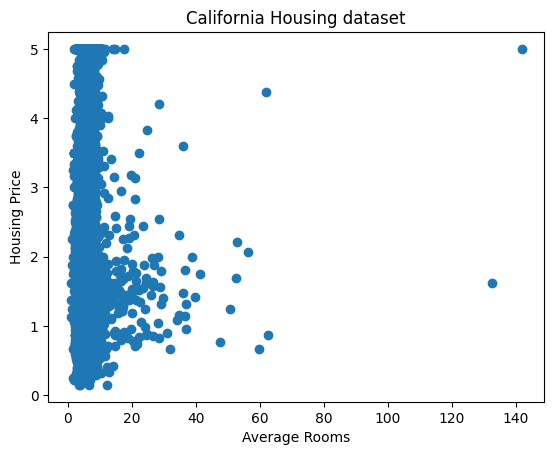

In [674]:
plt.scatter(X[:, column_mapping["AveRooms"]], y)
plt.xlabel("Average Rooms")
plt.ylabel("Housing Price")
plt.title("California Housing dataset")
plt.show()

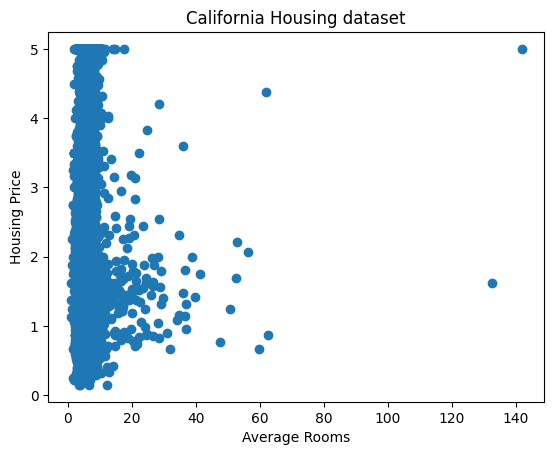

In [675]:
plt.scatter(X[:, column_mapping["AveRooms"]], y)
plt.xlabel("Average Rooms")
plt.ylabel("Housing Price")
plt.title("California Housing dataset")
plt.show()

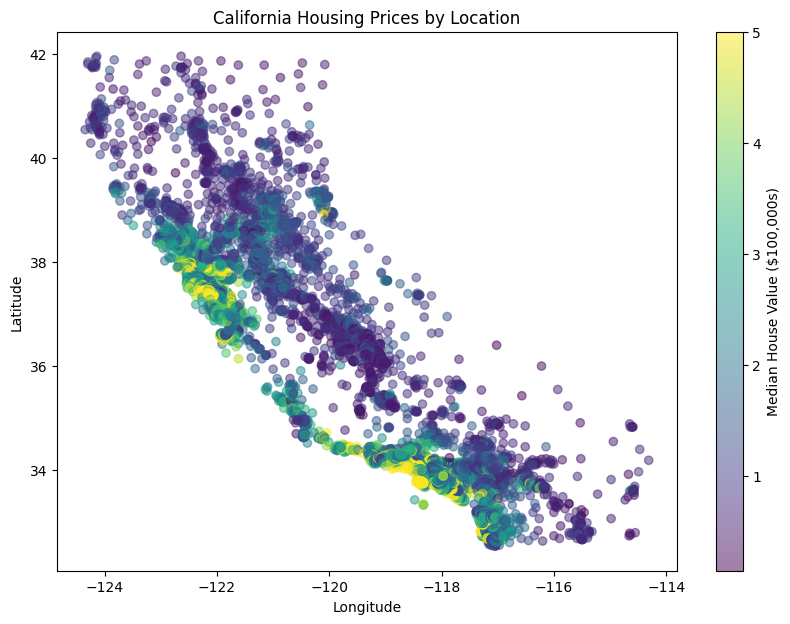

In [676]:
housing = fetch_california_housing(as_frame=True)
df = housing.frame  # pandas DataFrame with features + target

# Scatter plot
plt.figure(figsize=(10, 7))
sc = plt.scatter(df["Longitude"], df["Latitude"],
                 c=df["MedHouseVal"], cmap="viridis", alpha=0.5)
plt.colorbar(sc, label="Median House Value ($100,000s)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("California Housing Prices by Location")
plt.show()

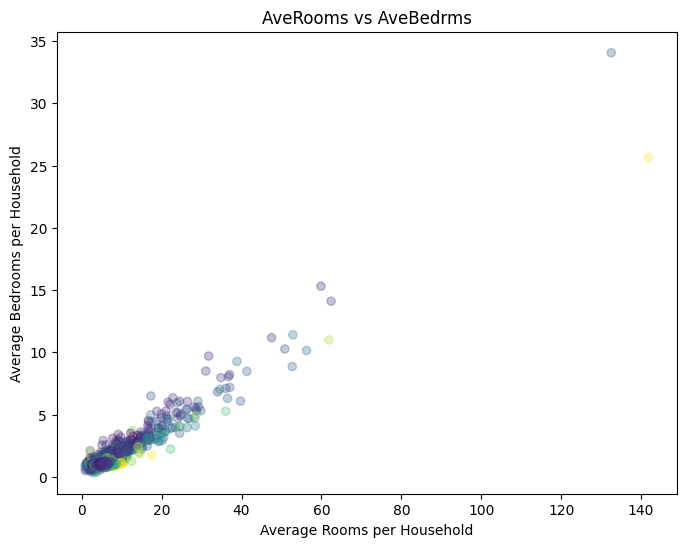

In [677]:
plt.figure(figsize=(8,6))
plt.scatter(df["AveRooms"], df["AveBedrms"], c = y, cmap="viridis", alpha=0.3)
plt.xlabel("Average Rooms per Household")
plt.ylabel("Average Bedrooms per Household")
plt.title("AveRooms vs AveBedrms")
plt.show()

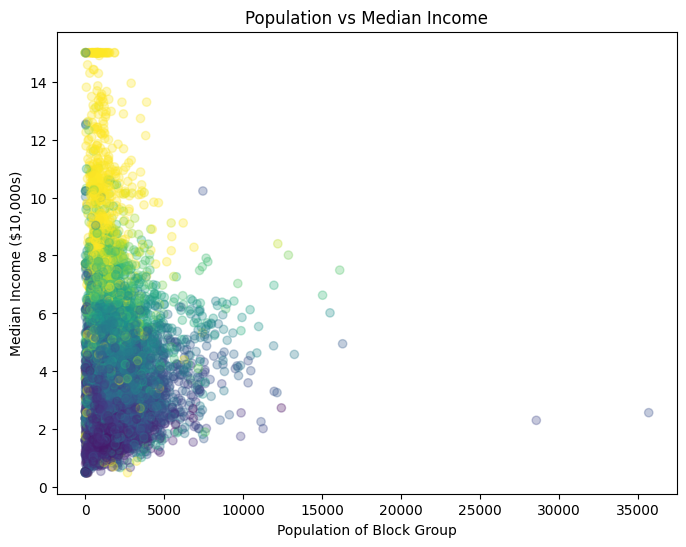

In [678]:
plt.figure(figsize=(8,6))
plt.scatter(df["Population"], df["MedInc"], c=y, cmap='viridis', alpha=0.3)
plt.xlabel("Population of Block Group")
plt.ylabel("Median Income ($10,000s)")
plt.title("Population vs Median Income")
plt.show()

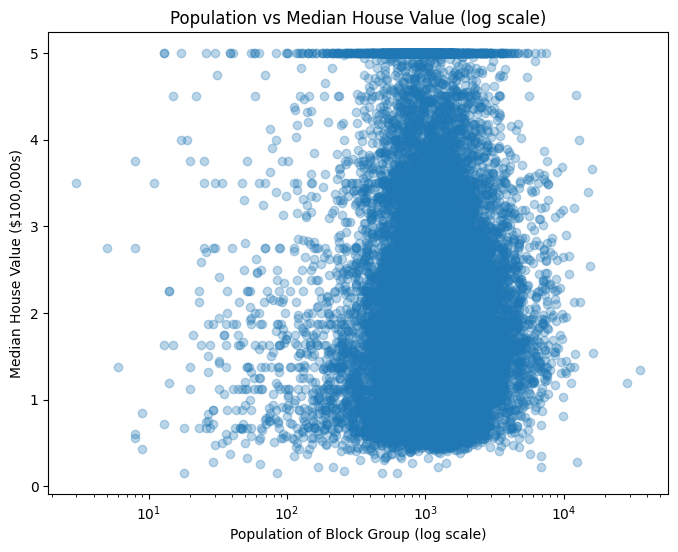

In [679]:
plt.figure(figsize=(8,6))
plt.scatter(df["Population"], df["MedHouseVal"], alpha=0.3)
plt.xscale("log")  # log-scale for population
plt.xlabel("Population of Block Group (log scale)")
plt.ylabel("Median House Value ($100,000s)")
plt.title("Population vs Median House Value (log scale)")
plt.show()

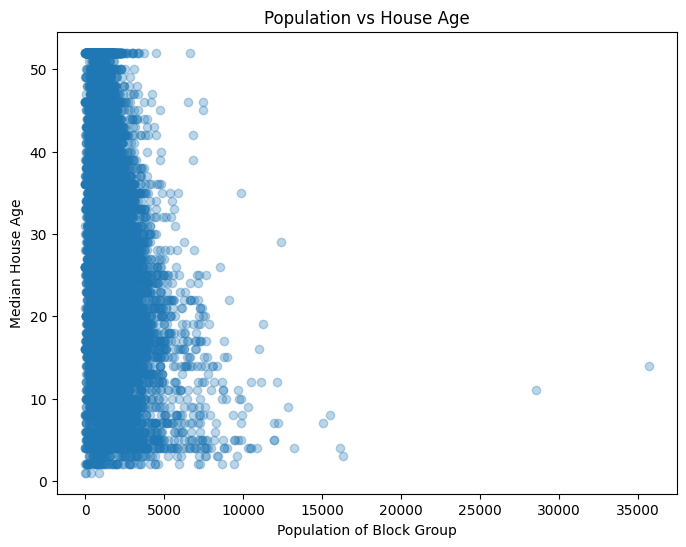

In [680]:
plt.figure(figsize=(8,6))
plt.scatter(df["Population"], df["HouseAge"], alpha=0.3)
plt.xlabel("Population of Block Group")
plt.ylabel("Median House Age")
plt.title("Population vs House Age")
plt.show()

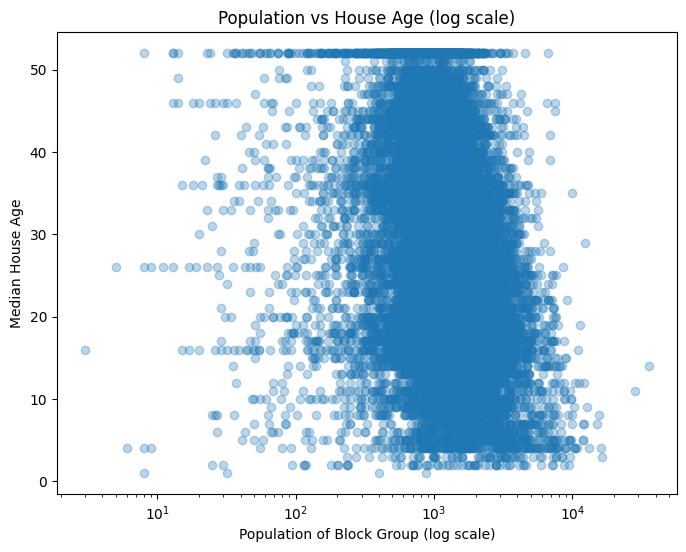

In [681]:
plt.figure(figsize=(8,6))
plt.scatter(df["Population"], df["HouseAge"], alpha=0.3)
plt.xscale("log")  # log-scale for population
plt.xlabel("Population of Block Group (log scale)")
plt.ylabel("Median House Age")
plt.title("Population vs House Age (log scale)")
plt.show()

In [682]:
df["RoomsPerOccup"] = df["AveRooms"] / df["AveOccup"]
df["RoomsPerBedrms"] = df["AveRooms"] / df["AveBedrms"]
df["LogAveRooms"] = df["AveRooms"].apply(math.log1p)
df[["RoomsPerOccup", "RoomsPerBedrms", "LogAveRooms"]].describe()

,RoomsPerOccup,RoomsPerBedrms,LogAveRooms
count,20640.000000,20640.000000,20640.000000
mean,1.976970,4.984262,1.828722
std,1.146020,1.171836,0.231938
min,0.002547,1.000000,0.613104
25%,1.522382,4.169542,1.693911
50%,1.937936,4.921728,1.829236
75%,2.296090,5.700424,1.953365
max,55.222222,10.000000,4.962209


In [683]:
center_longitude = -125
center_latitude = 32

df["RadiusFromCenter"] = (
    (df["Latitude"] - center_latitude)**2 +
    (df["Longitude"] - center_longitude)**2
)**0.5
df["AngleFromCenter"] = df.apply(
    lambda row: math.atan2(row["Latitude"] - center_latitude, row["Longitude"] - center_longitude),
    axis=1
)

df[["RadiusFromCenter", "AngleFromCenter"]].describe()

,RadiusFromCenter,AngleFromCenter
count,20640.000000,20640.000000
mean,7.120725,0.607798
std,0.741516,0.407864
min,5.170890,0.067735
25%,6.703531,0.270050
50%,7.060790,0.335292
75%,7.491657,1.064210
max,10.956756,1.499778


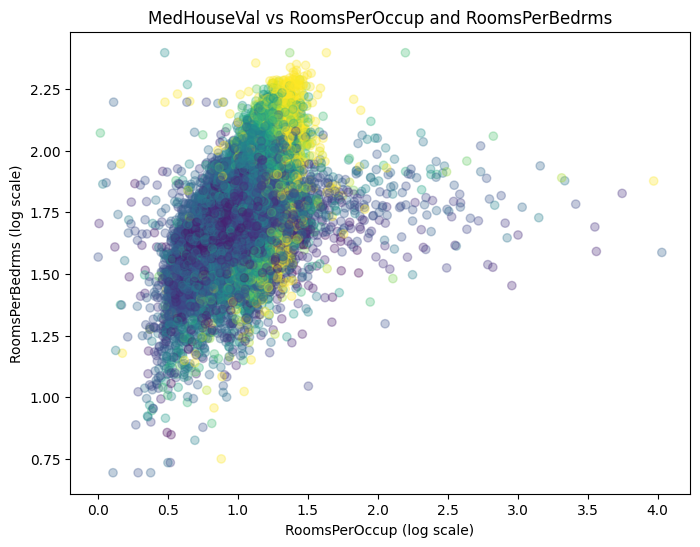

In [684]:
plt.figure(figsize=(8,6))
plt.scatter(df["RoomsPerOccup"].apply(math.log1p), df["RoomsPerBedrms"].apply(math.log1p), c=df["MedHouseVal"], cmap="viridis", alpha=0.3)
plt.xlabel("RoomsPerOccup (log scale)")
plt.ylabel("RoomsPerBedrms (log scale)")
plt.title("MedHouseVal vs RoomsPerOccup and RoomsPerBedrms")
plt.show()

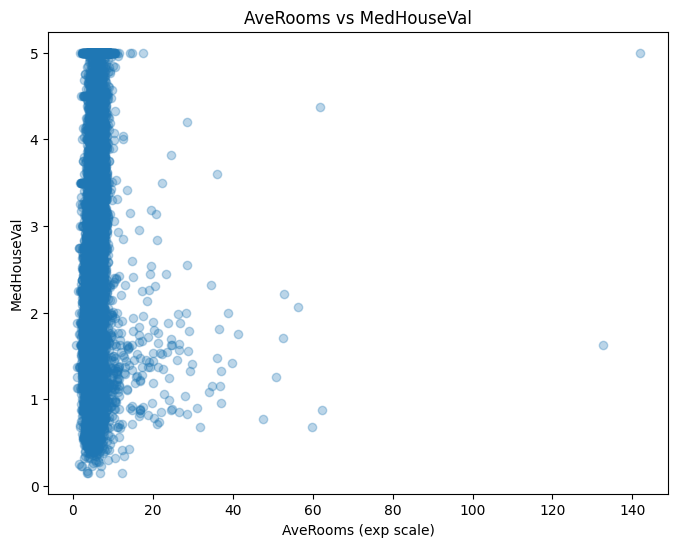

In [685]:
plt.figure(figsize=(8,6))
plt.scatter(df["AveRooms"], df["MedHouseVal"], alpha=0.3)
plt.xlabel("AveRooms (exp scale)")
plt.ylabel("MedHouseVal")
plt.title("AveRooms vs MedHouseVal")
plt.show()

In [686]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()

# df["MedHouseVal"]= df["MedHouseVal"].apply(math.log)

df[["RoomsPerOccup", "RoomsPerBedrms", "LogAveRooms", "RadiusFromCenter", "AngleFromCenter"]] = standard_scaler.fit_transform(
    df[["RoomsPerOccup", "RoomsPerBedrms", "LogAveRooms", "RadiusFromCenter", "AngleFromCenter"]]
)  

df[["MedInc", "HouseAge", "AveRooms", "AveBedrms", "Population", "AveOccup", "MedHouseVal"]] = minmax_scaler.fit_transform(
    df[["MedInc", "HouseAge", "AveRooms", "AveBedrms", "Population", "AveOccup", "MedHouseVal"]]
)

feature_columns = [
    "MedInc", "HouseAge", "Population", "AveOccup",
    "RoomsPerOccup", "RoomsPerBedrms", "LogAveRooms",
    "RadiusFromCenter", "AngleFromCenter"
]

X = df[feature_columns].values
y = df["MedHouseVal"].values

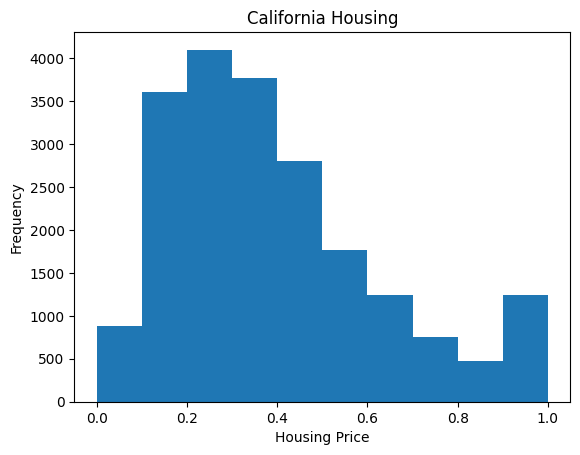

In [687]:
plt.hist(df["MedHouseVal"])
plt.xlabel("Housing Price")
plt.ylabel("Frequency")
plt.title("California Housing")
plt.show()

Data Split

In [688]:
num_datapoints = 20640
num_train = int(num_datapoints * 0.6)
num_val = int(num_datapoints * 0.2)
num_test = int(num_datapoints * 0.2)

print(num_train, num_val, num_test)

# Step 1: Split into train+val and test (e.g., 20% test)
trainX, testX, trainY, testY = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Step 2: Split train+val into train and validation (e.g., 25% val of remaining 80%)
trainX, valX, trainY, valY = train_test_split(
    trainX, trainY, test_size=0.25, random_state=42
)

print(len(trainX), len(trainY), len(valX), len(valY), len(testX), len(testY))
print(trainX.shape, valX.shape, testX.shape)

trainX = trainX.tolist()
valX = valX.tolist()
testX = testX.tolist()
trainY = [[val] for val in trainY.tolist()]
valY = [[val] for val in valY.tolist()]
testY = [[val] for val in testY.tolist()]

input_dim = X.shape[1]
output_dim = 1



12384 4128 4128
12384 12384 4128 4128 4128 4128
(12384, 9) (4128, 9) (4128, 9)


Selecting Model

In [689]:
nn = NeuralNetwork([
    FullyConnected(input_dim, 16, init=HeKaiming()),
    ReLU(),
    FullyConnected(16, 32, init=HeKaiming()),
    ReLU(),
    Dropout(0.5),
    FullyConnected(32, output_dim, init=RandomNormal(0.01, 0.01)),
    Sigmoid(),
])

Hyperparameter Turning (Use Cross Validation) 
* Loss Function
* Optimizer (learning_rate, weight_decay, ...)
* Number of Epoch
* Model Specific (Initializations, Number of Neurons/Layers)

In [698]:
learning_rate = 0.05
weight_decay = 0.00

num_epochs = 100

loss_fn = MSE()
optimizer = Adam(learning_rate=learning_rate, weight_decay=weight_decay)
metric = MSEMetric()

Train Model With Best Hyperparameters (Use Cross Validation to Select the Best Model)

In [699]:
nn.init_params()

best_model = None
best_val_mse = float("inf")

epoch_training_data = []

for epoch in range(num_epochs):
    nn.train(trainX, trainY, loss_fn, optimizer)
    loss = loss_fn.loss_value

    if (epoch + 1) % 5 == 0 or epoch == 0:
        train_mse = nn.evaluate(trainX, trainY, metric)
        val_mse = nn.evaluate(valX, valY, metric)
        print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {loss:.4f}, Train MSE: {train_mse:.4f}, Val MSE: {val_mse:.4f}")

        # Save the best model
        if val_mse < best_val_mse:
            best_val_mse = val_mse
            best_model = copy.deepcopy(nn)

    # Store epoch training data
    epoch_training_data.append({
        "epoch": epoch + 1,
        "train_mse": train_mse,
        "val_mse": val_mse
    })

Epoch 1/100, Loss: 0.0776, Train MSE: 0.0715, Val MSE: 0.0743
Epoch 5/100, Loss: 0.0488, Train MSE: 0.0375, Val MSE: 0.0383
Epoch 10/100, Loss: 0.0436, Train MSE: 0.0320, Val MSE: 0.0327
Epoch 15/100, Loss: 0.0427, Train MSE: 0.0355, Val MSE: 0.0363
Epoch 20/100, Loss: 0.0401, Train MSE: 0.0306, Val MSE: 0.0315
Epoch 25/100, Loss: 0.0381, Train MSE: 0.0273, Val MSE: 0.0284
Epoch 30/100, Loss: 0.0346, Train MSE: 0.0253, Val MSE: 0.0260
Epoch 35/100, Loss: 0.0346, Train MSE: 0.0219, Val MSE: 0.0231
Epoch 40/100, Loss: 0.0327, Train MSE: 0.0200, Val MSE: 0.0212
Epoch 45/100, Loss: 0.0307, Train MSE: 0.0197, Val MSE: 0.0209
Epoch 50/100, Loss: 0.0298, Train MSE: 0.0184, Val MSE: 0.0192
Epoch 55/100, Loss: 0.0295, Train MSE: 0.0173, Val MSE: 0.0178
Epoch 60/100, Loss: 0.0285, Train MSE: 0.0183, Val MSE: 0.0189
Epoch 65/100, Loss: 0.0277, Train MSE: 0.0166, Val MSE: 0.0172
Epoch 70/100, Loss: 0.0283, Train MSE: 0.0157, Val MSE: 0.0162
Epoch 75/100, Loss: 0.0272, Train MSE: 0.0161, Val MSE: 0

Evaluate the Model with Test

In [700]:
test_mse = best_model.evaluate(testX, testY, metric)
test_r2 = best_model.evaluate(testX, testY, R2Metric())
print(f"Test R2: {test_r2:.4f}")
print(f"Test MSE: {test_mse:.4f}")
print(f"Baseline MSE: 0.0566")

Test R2: 0.7101
Test MSE: 0.0161
Baseline MSE: 0.0566


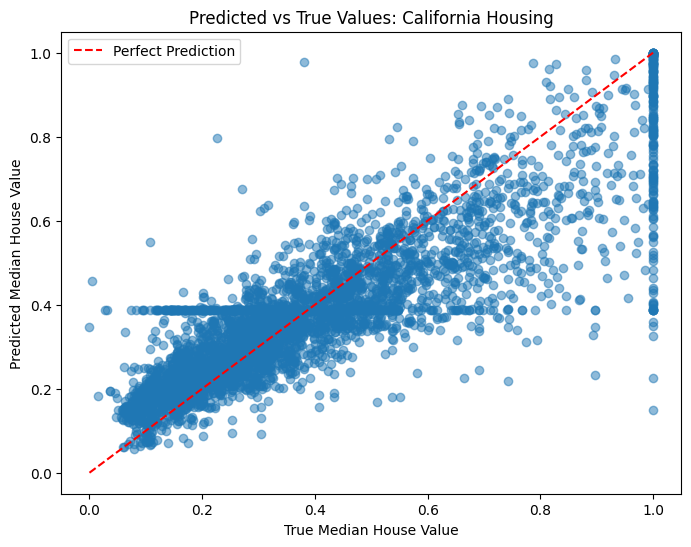

In [701]:
plt.figure(figsize=(8,6))
predictions = [pred[0] for pred in best_model.forward(testX, training=False)]
true_values = [true[0] for true in testY]

plt.scatter(true_values, predictions, alpha=0.5)
plt.xlabel("True Median House Value")
plt.ylabel("Predicted Median House Value")
plt.title("Predicted vs True Values: California Housing")

# Add perfect prediction line
min_val = min(true_values)
max_val = max(true_values)
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label="Perfect Prediction")
plt.legend()

plt.show()


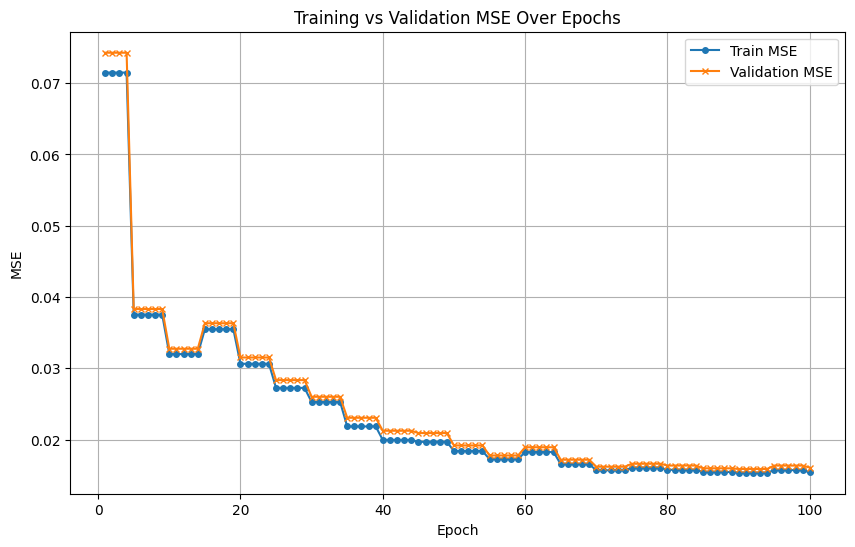

In [702]:
# Extract data for plotting
epochs = [d["epoch"] for d in epoch_training_data]
train_mse = [d["train_mse"] for d in epoch_training_data]
val_mse = [d["val_mse"] for d in epoch_training_data]

# Plot
plt.figure(figsize=(10,6))
plt.plot(epochs, train_mse, label="Train MSE", marker='o', markersize=4)
plt.plot(epochs, val_mse, label="Validation MSE", marker='x', markersize=4)
plt.xlabel("Epoch")
plt.ylabel("MSE")
plt.title("Training vs Validation MSE Over Epochs")
plt.legend()
plt.grid(True)
plt.show()